In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

## Data - Movielens

In [2]:
ratings = pd.read_table('../data/ml-1m/ratings.dat',sep='::',names=['user','movie','rating','time'])
#users = pd.read_table('../data/ml-10M100K/users.dat',sep='::',names=['user','gender','age','occupation','zip'])
movies = pd.read_table('../data/ml-1m/movies.dat',sep='::',names=['movie','title','genre'])

In [3]:
ratings.head(10)

,user,movie,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [4]:
movies.head()

,movie,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = ratings[['user','movie','rating']]

In [6]:
ratings.head()

,user,movie,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [7]:
df = pd.merge(ratings, movies, how='left')

In [8]:
df.head()

,user,movie,rating,title,genre
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,My Fair Lady (1964),Musical|Romance
3,1,3408,4,Erin Brockovich (2000),Drama
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy


### Using Implicit Feedback data for this Experiments
### Set All ratings to 1 (Watch or not)

In [9]:
df['rating'] = df['rating'].apply(lambda x: 1)

In [10]:
df.head()

,user,movie,rating,title,genre
0,1,1193,1,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,1,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,1,My Fair Lady (1964),Musical|Romance
3,1,3408,1,Erin Brockovich (2000),Drama
4,1,2355,1,"Bug's Life, A (1998)",Animation|Children's|Comedy


## Create Sparse matrix
### Warning - Memory issue caused when Dataset is big

In [12]:
users_items_matrix_df = df.pivot(index   = 'user', 
                                 columns = 'movie', 
                                 values  = 'rating').fillna(0)
users_items_matrix_df.head(10)

movie,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
users_items_matrix_df.loc[1,1193]

1.0

In [14]:
users_items_matrix_df.shape

(6040, 3706)

In [16]:
zero_count = 0
total_count = 0
non_zero_count = 0
for i in users_items_matrix_df.values:
    for j in i:
        if j == 0:
            zero_count = zero_count+1
        elif j == 1:
            non_zero_count = non_zero_count+1
        total_count = total_count+1

In [17]:
total_count

22384240

In [20]:
#Check sparsity of matrix
print ("Sparsity : ", zero_count/total_count)

Sparsity :  0.9553163743776871


### Create a Metadata for add - genre

In [21]:
def split_genres(genres):
    tokens = []
    for v in genres:
        tokens.extend(v.split('|'))
    return " ".join(tokens)

In [22]:
#Concatenate all genres of items which one user watched
user_genres = df.groupby('user')['genre'].apply(list).reset_index()
user_genres.head()

,user,genre
0,1,"[Drama, Animation|Children's|Musical, Musical|..."
1,2,"[Drama|Romance, Drama, Comedy, Drama|War, Acti..."
2,3,"[Comedy, Comedy, Action|Adventure|Mystery, Com..."
3,4,"[Drama, Action|Adventure|Romance|Sci-Fi|War, A..."
4,5,"[Adventure|Animation|Film-Noir, Drama, Comedy|..."


In [24]:
#Tokenize genres
user_genres['tokens'] = user_genres['genre'].apply(split_genres)
user_genres.head()

,user,genre,tokens
0,1,"[Drama, Animation|Children's|Musical, Musical|...",Drama Animation Children's Musical Musical Rom...
1,2,"[Drama|Romance, Drama, Comedy, Drama|War, Acti...",Drama Romance Drama Comedy Drama War Action Cr...
2,3,"[Comedy, Comedy, Action|Adventure|Mystery, Com...",Comedy Comedy Action Adventure Mystery Comedy ...
3,4,"[Drama, Action|Adventure|Romance|Sci-Fi|War, A...",Drama Action Adventure Romance Sci-Fi War Acti...
4,5,"[Adventure|Animation|Film-Noir, Drama, Comedy|...",Adventure Animation Film-Noir Drama Comedy Sci...


In [26]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [27]:
#One hot encodding each genres
vocab_size   = 200
encoded_docs = [one_hot(d, vocab_size) for d in user_genres.tokens]

In [28]:
#Create User genre matrix
max_length  = 50
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[114  73  21 ... 104  28 104]
 [104 104 104 ...  28 104 104]
 [180 114  73 ...  73  21 104]
 ...
 [104 104 104 ...   0   0   0]
 [104  21 104 ... 149   1 190]
 [104  38  73 ... 149   1 190]]


## Define Autoencoder keras model

In [29]:
from keras import backend as K
from keras import regularizers

## Paper Used Masked MSE on Explicit Dataset
## But on my experiments with Implicit Dataset, Using vanila mse can lead better results

In [30]:
# Root - Masked mean squared error
def rmse(y_true, y_pred):
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    masked_squared_error = mask_true * K.square((y_true - y_pred))
    masked_mse = K.sum(masked_squared_error, axis=-1) / K.sum(mask_true, axis=-1)
    return K.sqrt(masked_mse)

In [31]:
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add, Concatenate
from keras.models import Model
from keras.layers import Add

In [98]:
#Dense re-feeding

def autoEncoder(X):
    users_items_matrix, content_info = X

    # Input
    input_layer   = Input(shape=(users_items_matrix.shape[1],))
    input_content = Input(shape=(content_info.shape[1],))
   
    encoder1 = Dense(256, activation='selu', kernel_initializer='glorot_uniform')
    encoder2 = Dense(256, activation='selu', kernel_initializer='glorot_uniform')
    code = Dense(256, activation='selu', kernel_initializer='glorot_uniform')
    dropout = Dropout(0.5)
    decoder1 = Dense(256, activation='selu', kernel_initializer='glorot_uniform')
    decoder2 = Dense(256, activation='selu', kernel_initializer='glorot_uniform')
    out = Dense(users_items_matrix.shape[1], activation='selu', kernel_initializer='glorot_uniform')
    concat = Concatenate()
    
    
    encoded1 = encoder1(input_layer)
    encoded2 = encoder2(encoded1)
    coded = code(encoded2)
    x_content = Embedding(200, 128, input_length=content_info.shape[1])(input_content)
    x_content = Flatten()(x_content)
    x_content = Dense(256, activation='selu')(x_content)
    concated = concat([coded,x_content])
    dropped = dropout(concated)
    decoded1 = decoder1(dropped)
    decoded2 = decoder2(decoded1)
    temp_output = out(decoded2)
    
    re_encoded1 = encoder1(temp_output)
    re_encoded2 = encoder2(re_encoded1)
    re_coded = code(re_encoded2)
    re_concated = concat([re_coded,x_content])
    re_dropped = dropout(re_concated)
    re_decoded1 = decoder1(re_dropped)
    re_decoded2 = decoder2(re_decoded1)
    output = out(re_decoded2)
    
    model = Model([input_layer, input_content], outputs=output)
    return model
    #print(model.summary())
    # plot_model(model, to_file='mode

In [99]:
# input with user genres
X = [users_items_matrix_df.values, padded_docs]
y = users_items_matrix_df.values

In [100]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 3706)         0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 256)          948992      input_9[0][0]                    
                                                                 dense_34[0][0]                   
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 50, 128)      25600       input_10[0][0]                   
__________

In [101]:
# Using default mse with implicit feedback
model = autoEncoder(X)
model.compile(optimizer = Adam(lr=0.0001), loss='mse')

In [102]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

## Start Training

In [103]:
loss_history = model.fit(x=X, y=y,epochs=50,batch_size=64,shuffle=True,validation_split=0.2)

Train on 4832 samples, validate on 1208 samples
Epoch 1/50
4832/4832 [==============================] - 3s 714us/step - loss: 0.1032 - val_loss: 0.0487
Epoch 2/50
4832/4832 [==============================] - 3s 522us/step - loss: 0.0567 - val_loss: 0.0403
Epoch 3/50
4832/4832 [==============================] - 3s 526us/step - loss: 0.0445 - val_loss: 0.0361
Epoch 4/50
4832/4832 [==============================] - 3s 527us/step - loss: 0.0399 - val_loss: 0.0348
Epoch 5/50
4832/4832 [==============================] - 3s 531us/step - loss: 0.0380 - val_loss: 0.0342
Epoch 6/50
4832/4832 [==============================] - 3s 520us/step - loss: 0.0371 - val_loss: 0.0339
Epoch 7/50
4832/4832 [==============================] - 3s 531us/step - loss: 0.0365 - val_loss: 0.0336
Epoch 8/50
4832/4832 [==============================] - 3s 534us/step - loss: 0.0361 - val_loss: 0.0337
Epoch 9/50
4832/4832 [==============================] - 3s 524us/step - loss: 0.0359 - val_loss: 0.0335
Epoch 10/50
4832

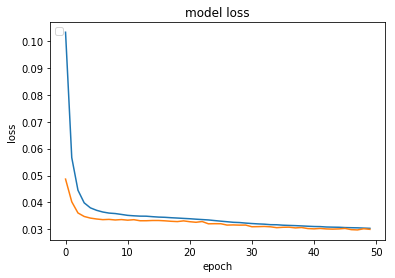

In [104]:

fig, ax = plt.subplots()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(loss_history.history['loss'])
plt.plot(loss_history.history['val_loss'])


## Recommender

In [105]:
#Predict for un-seen movies
new_matrix = model.predict(X) * (X[0] == 0)

In [106]:
# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix_df  = pd.DataFrame(new_matrix, columns = users_items_matrix_df.columns, index   = users_items_matrix_df.index)
new_users_items_matrix_df.head()

movie,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.090029,0.083262,0.008980,0.059288,-0.195112,0.077012,0.001544,-0.044395,-0.101739,...,0.025828,0.007859,0.022054,-0.015375,0.002490,0.100216,0.027388,0.003245,-0.015618,0.029878
2,0.219098,0.016730,0.028406,-0.002361,0.005082,0.213726,0.047867,0.000349,-0.003871,0.175404,...,0.014153,-0.010027,0.007379,-0.004628,0.001304,0.112333,0.051060,0.002049,0.020739,0.048127
3,0.170986,0.013944,0.024389,-0.024538,-0.012737,-0.025500,0.014585,0.008737,-0.003661,0.013056,...,0.009047,0.006536,0.004777,-0.003587,-0.013076,0.042108,0.017013,0.006241,-0.001149,0.013064
4,0.129592,0.036737,-0.009355,-0.035010,0.012473,0.048723,-0.074898,0.011662,-0.006234,0.052835,...,-0.006501,0.007840,0.000495,0.000372,0.000820,0.030855,0.002745,0.000250,0.015470,0.006454
5,0.395422,0.012006,-0.007731,0.041599,-0.038093,0.000000,0.053074,-0.013590,0.013927,0.047099,...,0.052370,-0.021088,-0.004542,0.050256,0.029048,0.314394,0.164165,0.025353,0.032981,0.201064


In [107]:
def recommender_for_user(user_id, interact_matrix, df_content, topn = 100):
    pred_scores = interact_matrix.loc[user_id].values

    df_scores   = pd.DataFrame({'movie': list(users_items_matrix_df.columns), 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('movie')\
                    .join(df_content.set_index('movie'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'title', 'genre']]
    
    return df_rec[df_rec.score > 0]

## User #745

In [108]:
recommender_for_user(user_id         = 745, 
                     interact_matrix = users_items_matrix_df, 
                     df_content      = movies)

,score,title,genre
movie,,,
3952,1.0,"Contender, The (2000)",Drama|Thriller
3895,1.0,"Watcher, The (2000)",Crime|Thriller
3915,1.0,Girlfight (2000),Drama
3911,1.0,Best in Show (2000),Comedy
3910,1.0,Dancer in the Dark (2000),Drama|Musical
1221,1.0,"Godfather: Part II, The (1974)",Action|Crime|Drama
3908,1.0,Urban Legends: Final Cut (2000),Horror
788,1.0,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi
3897,1.0,Almost Famous (2000),Comedy|Drama


In [109]:
recommender_for_user(user_id         = 745, 
                     interact_matrix = new_users_items_matrix_df, 
                     df_content      = movies)

,score,title,genre
movie,,,
2858,0.313652,American Beauty (1999),Comedy|Drama
2997,0.192413,Being John Malkovich (1999),Comedy
2396,0.151968,Shakespeare in Love (1998),Comedy|Romance
2762,0.133894,"Sixth Sense, The (1999)",Thriller
3160,0.130692,Magnolia (1999),Drama
2599,0.127620,Election (1999),Comedy
593,0.124791,"Silence of the Lambs, The (1991)",Drama|Thriller
3408,0.122398,Erin Brockovich (2000),Drama
1193,0.120736,One Flew Over the Cuckoo's Nest (1975),Drama


## User #77

In [110]:
recommender_for_user(user_id         = 77, 
                     interact_matrix = users_items_matrix_df, 
                     df_content      = movies)

,score,title,genre
movie,,,
2395,1.0,Rushmore (1998),Comedy
2959,1.0,Fight Club (1999),Drama
2770,1.0,Bowfinger (1999),Comedy
2771,1.0,Brokedown Palace (1999),Drama
2188,1.0,54 (1998),Drama
2881,1.0,Double Jeopardy (1999),Action|Thriller
2882,1.0,Jakob the Liar (1999),Drama
2710,1.0,"Blair Witch Project, The (1999)",Horror
2707,1.0,Arlington Road (1999),Thriller


In [111]:
recommender_for_user(user_id         = 77, 
                     interact_matrix = new_users_items_matrix_df, 
                     df_content      = movies)

,score,title,genre
movie,,,
2396,0.284393,Shakespeare in Love (1998),Comedy|Romance
3160,0.227305,Magnolia (1999),Drama
3176,0.204148,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
608,0.203959,Fargo (1996),Crime|Drama|Thriller
2355,0.200393,"Bug's Life, A (1998)",Animation|Children's|Comedy
3793,0.196490,X-Men (2000),Action|Sci-Fi
593,0.193005,"Silence of the Lambs, The (1991)",Drama|Thriller
223,0.192909,Clerks (1994),Comedy
3481,0.185397,High Fidelity (2000),Comedy


In [114]:
recommender_for_user(user_id         = 164, 
                     interact_matrix = users_items_matrix_df, 
                     df_content      = movies)

,score,title,genre
movie,,,
899,1.0,Singin' in the Rain (1952),Musical|Romance
911,1.0,Charade (1963),Comedy|Mystery|Romance|Thriller
3011,1.0,"They Shoot Horses, Don't They? (1969)",Drama
2496,1.0,Blast from the Past (1999),Comedy|Romance
2067,1.0,Doctor Zhivago (1965),Drama|Romance|War
3751,1.0,Chicken Run (2000),Animation|Children's|Comedy
1283,1.0,High Noon (1952),Western
2206,1.0,Suspicion (1941),Mystery|Thriller
3675,1.0,White Christmas (1954),Musical


In [115]:
recommender_for_user(user_id         = 164, 
                     interact_matrix = new_users_items_matrix_df, 
                     df_content      = movies)

,score,title,genre
movie,,,
2858,0.342245,American Beauty (1999),Comedy|Drama
527,0.189220,Schindler's List (1993),Drama|War
608,0.186366,Fargo (1996),Crime|Drama|Thriller
2997,0.175172,Being John Malkovich (1999),Comedy
2396,0.172300,Shakespeare in Love (1998),Comedy|Romance
593,0.162530,"Silence of the Lambs, The (1991)",Drama|Thriller
318,0.160927,"Shawshank Redemption, The (1994)",Drama
1193,0.157269,One Flew Over the Cuckoo's Nest (1975),Drama
1617,0.155273,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
